In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

*gender* - Whether the customer is a male or a female

*SeniorCitizen* - Whether the customer is a senior citizen or not (1, 0)

*Partner* - Whether the customer has a partner or not (Yes, No)

*Dependents* -Whether the customer has dependents or not (Yes, No)

*tenure* - Number of months the customer has stayed with the company

*PhoneService* - Whether the customer has a phone service or not (Yes, No)

*MultipleLines* - Whether the customer has multiple lines or not (Yes, No, No phone service)

*InternetService* - Customer’s internet service provider (DSL, Fiber optic, No)

*OnlineSecurity* - Whether the customer has online security or not (Yes, No, No internet service)

*OnlineBackup* - Whether the customer has online backup or not (Yes, No, No internet service)

*DeviceProtection* - Whether the customer has device protection or not (Yes, No, No internet service)

*TechSupport* - Whether the customer has tech support or not (Yes, No, No internet service)

*StreamingTV* - Whether the customer has streaming TV or not (Yes, No, No internet service)

*StreamingMovies* - Whether the customer has streaming movies or not (Yes, No, No internet service)

*Contract* - The contract term of the customer (Month-to-month, One year, Two year)

*PaperlessBilling* - Whether the customer has paperless billing or not (Yes, No)

*PaymentMethod* - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

*MonthlyCharges* - The amount charged to the customer monthly

*TotalCharges* - The total amount charged to the customer

*Churn* - Whether the customer churned or not (Yes or No)

In [6]:
data = data[data["TotalCharges"] != " "]

In [7]:
for column in data.columns:
    if data[column].nunique() == 2:
        if "Yes" in data[column].unique():
            data[column] = data[column].replace(["Yes", "No"], [1,0])
        elif "Male" in data[column].unique():
            data[column] = data[column].replace(["Male", "Female"], [1,0])

C:\Users\nemet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nemet\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [8]:
data["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7032, dtype: object

In [9]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="ignore")

In [10]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
data.describe()

gender  SeniorCitizen  Partner  Dependents   tenure  PhoneService  \
count 7032.000       7032.000 7032.000    7032.000 7032.000      7032.000   
mean     0.505          0.162    0.483       0.298   32.422         0.903   
std      0.500          0.369    0.500       0.458   24.545         0.296   
min      0.000          0.000    0.000       0.000    1.000         0.000   
25%      0.000          0.000    0.000       0.000    9.000         1.000   
50%      1.000          0.000    0.000       0.000   29.000         1.000   
75%      1.000          0.000    1.000       1.000   55.000         1.000   
max      1.000          1.000    1.000       1.000   72.000         1.000   

       PaperlessBilling  MonthlyCharges  TotalCharges    Churn  
count          7032.000        7032.000      7032.000 7032.000  
mean              0.593          64.798      2283.300    0.266  
std               0.491          30.086      2266.771    0.442  
min               0.000          18.250        18.800    0.000  
25%               0.000          35.588       401.450    0.000  
50%               1.000          70.350      1397.475    0.000  
75%               1.000          89.862      3794.738    1.000  
max               1.000         118.750      8684.800    1.000

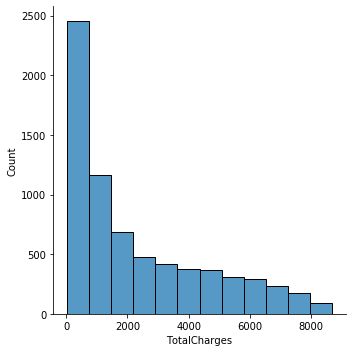

In [11]:
sns.displot(data["TotalCharges"], bins=12)

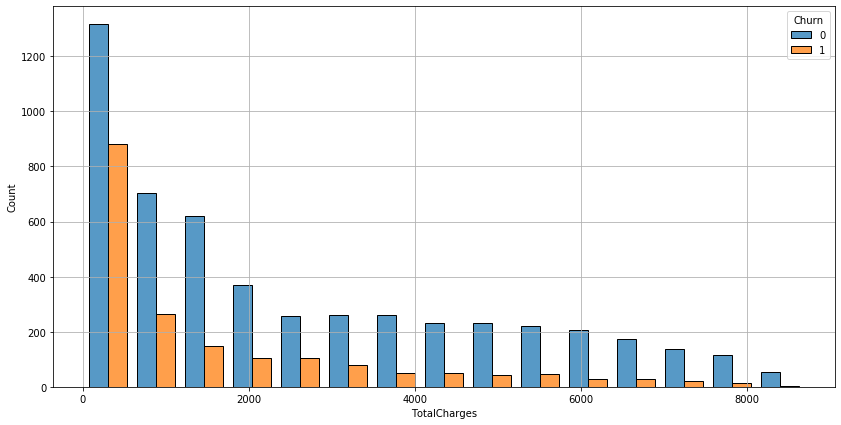

In [12]:
fig = plt.figure(figsize=(14,7))
sns.histplot(x = "TotalCharges", data = data, bins=15, hue = "Churn", multiple="dodge", shrink=0.8)
plt.grid()

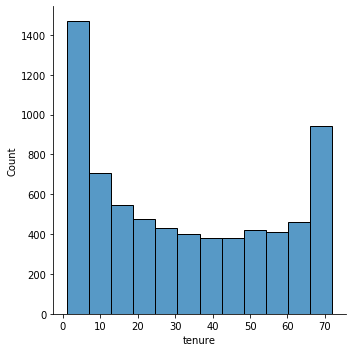

In [13]:
sns.displot(data["tenure"], bins=12)

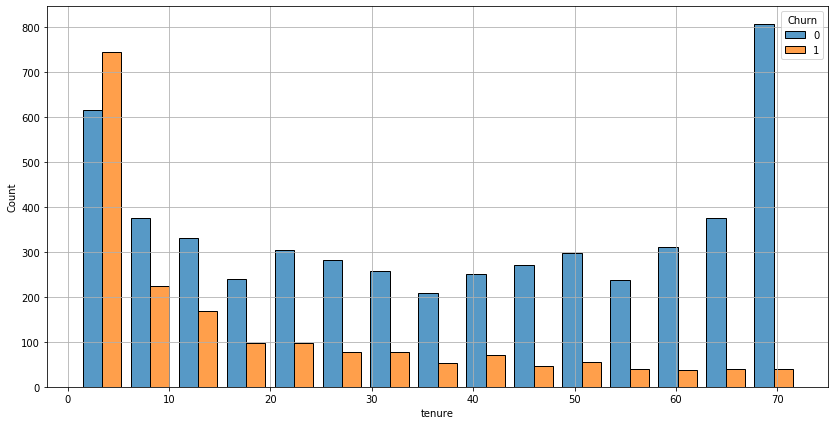

In [14]:
fig = plt.figure(figsize=(14,7))
sns.histplot(x = "tenure", data = data, bins=15, hue = "Churn", multiple="dodge", shrink=0.8)
plt.grid()

In [15]:
data[data["Churn"] == 1]["tenure"].describe()

count   1869.000
mean      17.979
std       19.531
min        1.000
25%        2.000
50%       10.000
75%       29.000
max       72.000
Name: tenure, dtype: float64

In [16]:
data[data["Churn"] == 0]["tenure"].describe()

count   5163.000
mean      37.650
std       24.077
min        1.000
25%       15.000
50%       38.000
75%       61.000
max       72.000
Name: tenure, dtype: float64

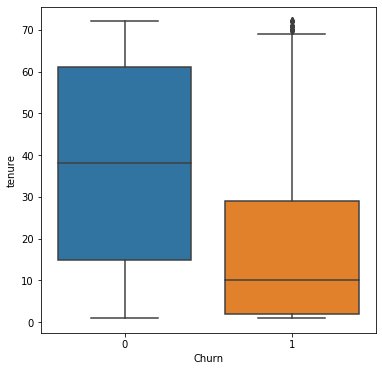

In [17]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(y = data["tenure"], x= data["Churn"])

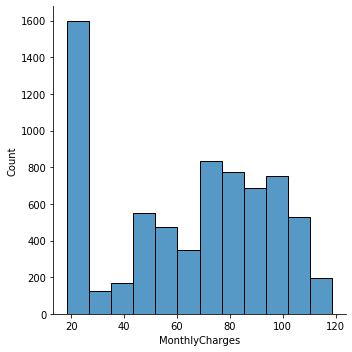

In [18]:
sns.displot(data["MonthlyCharges"], bins=12)

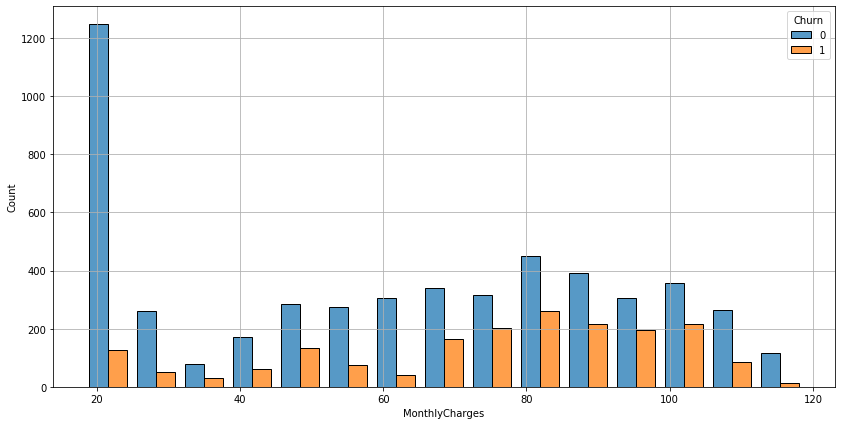

In [19]:
fig = plt.figure(figsize=(14,7))
sns.histplot(x = "MonthlyCharges", data = data, bins=15, hue = "Churn", multiple="dodge", shrink=0.8)
plt.grid()

In [20]:
data[data["Churn"] == 1]["MonthlyCharges"].describe()

count   1869.000
mean      74.441
std       24.666
min       18.850
25%       56.150
50%       79.650
75%       94.200
max      118.350
Name: MonthlyCharges, dtype: float64

In [21]:
data[data["Churn"] == 0]["MonthlyCharges"].describe()

count   5163.000
mean      61.307
std       31.095
min       18.250
25%       25.100
50%       64.450
75%       88.475
max      118.750
Name: MonthlyCharges, dtype: float64

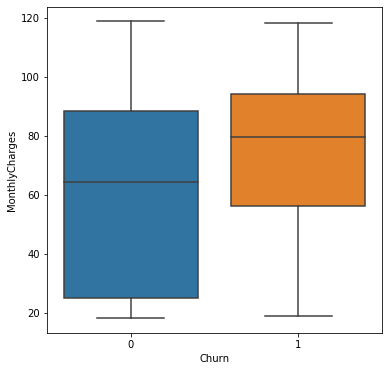

In [22]:
fig = plt.figure(figsize=(6,6))
sns.boxplot(y = data["MonthlyCharges"], x= data["Churn"])

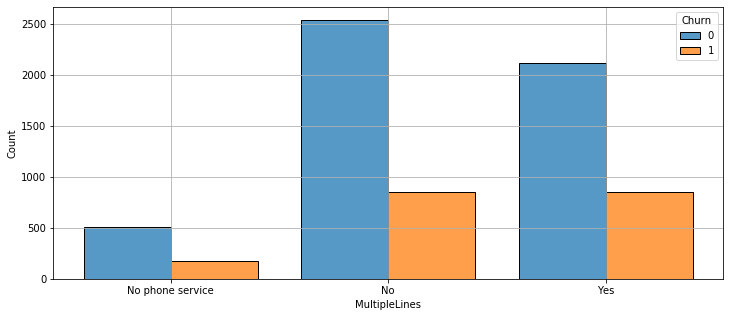

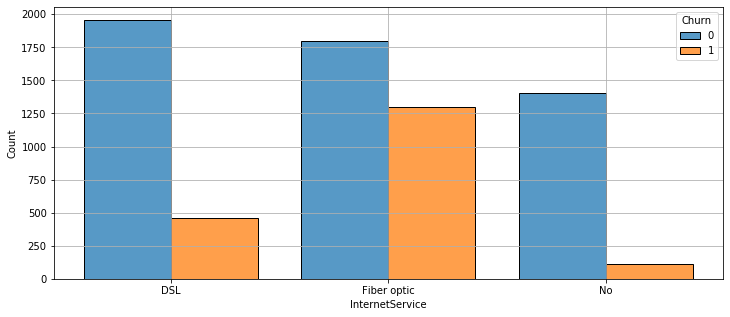

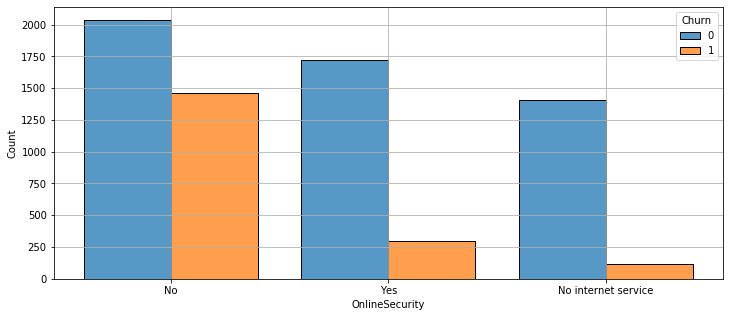

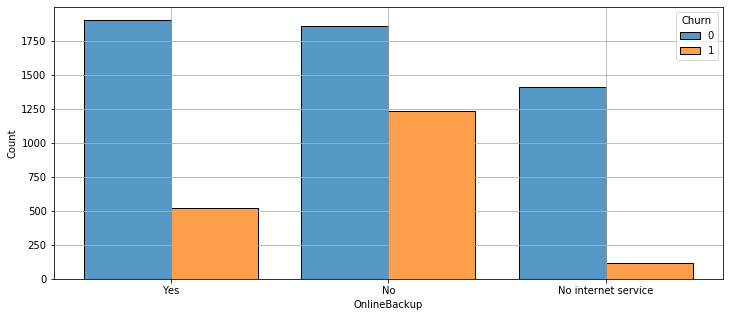

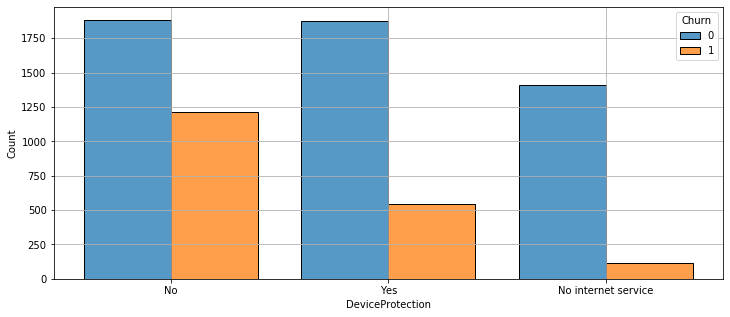

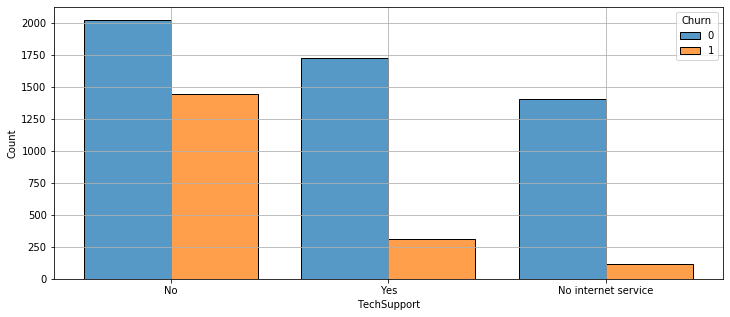

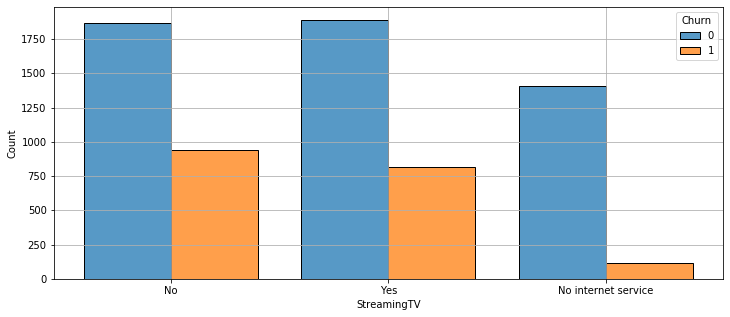

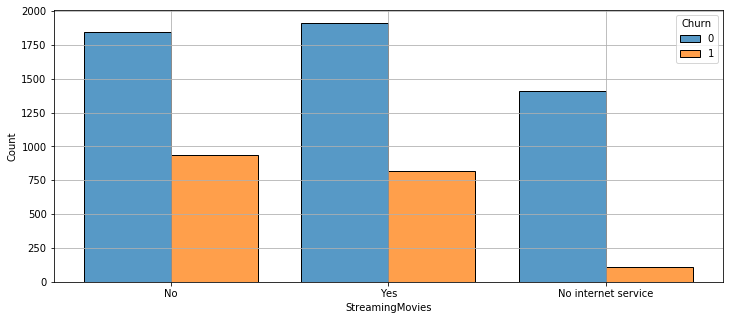

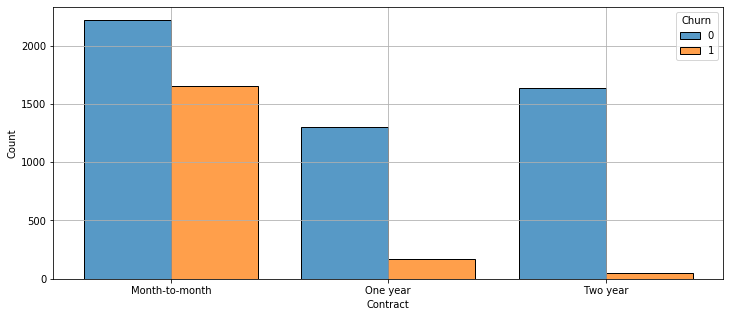

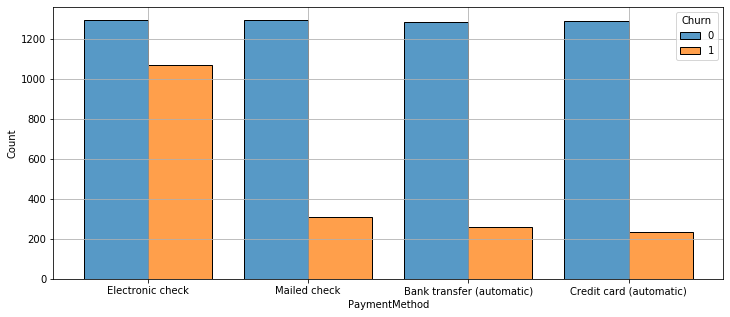

In [23]:
for column in data.columns.drop(["customerID", "Churn", "gender", "SeniorCitizen", "Partner", "Dependents",
                                 "tenure", "PhoneService", "PaperlessBilling", "MonthlyCharges", "TotalCharges"]):
    fig = plt.figure(figsize=(12,5))
    sns.histplot(data = data, x = column, bins=15, hue = "Churn", multiple="dodge", shrink=0.8)
    plt.grid()
    plt.show()

In [24]:
for column in data.columns:
    print(column, "\n", data[column].unique(), "\n", data[column].nunique())

customerID 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 
 7032
gender 
 [0 1] 
 2
SeniorCitizen 
 [0 1] 
 2
Partner 
 [1 0] 
 2
Dependents 
 [0 1] 
 2
tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 
 72
PhoneService 
 [0 1] 
 2
MultipleLines 
 ['No phone service' 'No' 'Yes'] 
 3
InternetService 
 ['DSL' 'Fiber optic' 'No'] 
 3
OnlineSecurity 
 ['No' 'Yes' 'No internet service'] 
 3
OnlineBackup 
 ['Yes' 'No' 'No internet service'] 
 3
DeviceProtection 
 ['No' 'Yes' 'No internet service'] 
 3
TechSupport 
 ['No' 'Yes' 'No internet service'] 
 3
StreamingTV 
 ['No' 'Yes' 'No internet service'] 
 3
StreamingMovies 
 ['No' 'Yes' 'No internet service'] 
 3
Contract 
 ['Month-to-month' 'One year' 'Two year'] 
 3
PaperlessBilling 
 [1 0] 
 2
PaymentMethod 
 ['Electronic ch

In [25]:
corr_matrix = data.corr(method="spearman")
corr_matrix

gender  SeniorCitizen  Partner  Dependents  tenure  \
gender             1.000         -0.002   -0.001       0.010   0.004   
SeniorCitizen     -0.002          1.000    0.017      -0.211   0.017   
Partner           -0.001          0.017    1.000       0.452   0.388   
Dependents         0.010         -0.211    0.452       1.000   0.169   
tenure             0.004          0.017    0.388       0.169   1.000   
PhoneService      -0.008          0.008    0.018      -0.001   0.008   
PaperlessBilling  -0.012          0.156   -0.014      -0.110   0.006   
MonthlyCharges    -0.013          0.221    0.109      -0.105   0.275   
TotalCharges      -0.001          0.107    0.343       0.083   0.889   
Churn             -0.009          0.151   -0.150      -0.163  -0.370   

                  PhoneService  PaperlessBilling  MonthlyCharges  \
gender                  -0.008            -0.012          -0.013   
SeniorCitizen            0.008             0.156           0.221   
Partner                  0.018            -0.014           0.109   
Dependents              -0.001            -0.110          -0.105   
tenure                   0.008             0.006           0.275   
PhoneService             1.000             0.017           0.240   
PaperlessBilling         0.017             1.000           0.346   
MonthlyCharges           0.240             0.346           1.000   
TotalCharges             0.085             0.154           0.638   
Churn                    0.012             0.191           0.184   

                  TotalCharges  Churn  
gender                  -0.001 -0.009  
SeniorCitizen            0.107  0.151  
Partner                  0.343 -0.150  
Dependents               0.083 -0.163  
tenure                   0.889 -0.370  
PhoneService             0.085  0.012  
PaperlessBilling         0.154  0.191  
MonthlyCharges           0.638  0.184  
TotalCharges             1.000 -0.232  
Churn                   -0.232  1.000

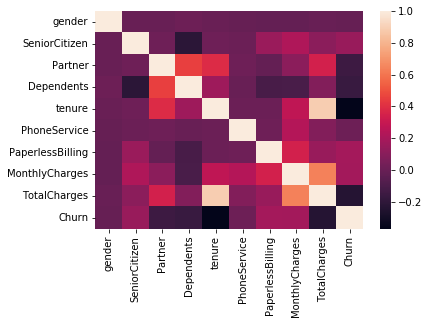

In [26]:
sns.heatmap(corr_matrix)

In [27]:
updated_data = data.drop(columns=["Partner", "TotalCharges", "MonthlyCharges"])

zastanowić się czy zdropować kolumnę *MonthyCharges* (ze względu na umiarkowanie wysoką korelację z *PaperlessBilling*)

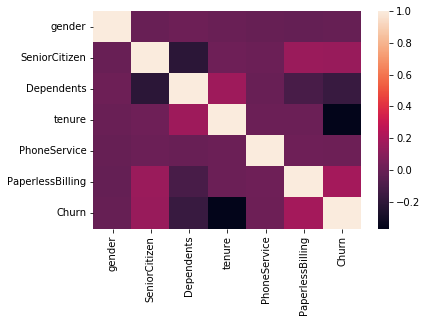

In [28]:
sns.heatmap(updated_data.corr(method="spearman"))

In [29]:
dummy_data = pd.get_dummies(data = updated_data, drop_first = True,
                            columns = ["MultipleLines", "InternetService", "OnlineSecurity",
                                       "OnlineBackup", "DeviceProtection", "TechSupport",
                                       "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]
                           )

In [30]:
dummy_data.head()

customerID  gender  SeniorCitizen  Dependents  tenure  PhoneService  \
0  7590-VHVEG       0              0           0       1             0   
1  5575-GNVDE       1              0           0      34             1   
2  3668-QPYBK       1              0           0       2             1   
3  7795-CFOCW       1              0           0      45             0   
4  9237-HQITU       0              0           0       2             1   

   PaperlessBilling  Churn  MultipleLines_No phone service  MultipleLines_Yes  \
0                 1      0                               1                  0   
1                 0      0                               0                  0   
2                 1      1                               0                  0   
3                 0      0                               1                  0   
4                 1      1                               0                  0   

   ...  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0  ...                0                                0                0   
1  ...                0                                0                0   
2  ...                0                                0                0   
3  ...                1                                0                0   
4  ...                0                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 29 columns]

In [31]:
corr_matrix = dummy_data.corr(method="spearman")
corr_matrix

gender  SeniorCitizen  Dependents  \
gender                                  1.000         -0.002       0.010   
SeniorCitizen                          -0.002          1.000      -0.211   
Dependents                              0.010         -0.211       1.000   
tenure                                  0.004          0.017       0.169   
PhoneService                           -0.008          0.008      -0.001   
PaperlessBilling                       -0.012          0.156      -0.110   
Churn                                  -0.009          0.151      -0.163   
MultipleLines_No phone service          0.008         -0.008       0.001   
MultipleLines_Yes                      -0.009          0.143      -0.024   
InternetService_Fiber optic            -0.011          0.255      -0.164   
InternetService_No                      0.005         -0.183       0.138   
OnlineSecurity_No internet service      0.005         -0.183       0.138   
OnlineSecurity_Yes                     -0.016         -0.039       0.081   
OnlineBackup_No internet service        0.005         -0.183       0.138   
OnlineBackup_Yes                       -0.013          0.067       0.024   
DeviceProtection_No internet service    0.005         -0.183       0.138   
DeviceProtection_Yes                   -0.001          0.060       0.014   
TechSupport_No internet service         0.005         -0.183       0.138   
TechSupport_Yes                        -0.009         -0.061       0.063   
StreamingTV_No internet service         0.005         -0.183       0.138   
StreamingTV_Yes                        -0.007          0.105      -0.016   
StreamingMovies_No internet service     0.005         -0.183       0.138   
StreamingMovies_Yes                    -0.010          0.120      -0.038   
Contract_One year                       0.008         -0.046       0.069   
Contract_Two year                      -0.004         -0.116       0.202   
PaymentMethod_Credit card (automatic)   0.002         -0.024       0.061   
PaymentMethod_Electronic check          0.001          0.171      -0.149   
PaymentMethod_Mailed check              0.013         -0.153       0.056   

                                       tenure  PhoneService  PaperlessBilling  \
gender                                  0.004        -0.008            -0.012   
SeniorCitizen                           0.017         0.008             0.156   
Dependents                              0.169        -0.001            -0.110   
tenure                                  1.000         0.008             0.006   
PhoneService                            0.008         1.000             0.017   
PaperlessBilling                        0.006         0.017             1.000   
Churn                                  -0.370         0.012             0.191   
MultipleLines_No phone service         -0.008        -1.000            -0.017   
MultipleLines_Yes                       0.338         0.280             0.164   
InternetService_Fiber optic             0.020         0.290             0.326   
InternetService_No                     -0.039         0.172            -0.321   
OnlineSecurity_No internet service     -0.039         0.172            -0.321   
OnlineSecurity_Yes                      0.330        -0.092            -0.004   
OnlineBackup_No internet service       -0.039         0.172            -0.321   
OnlineBackup_Yes                        0.361        -0.052             0.127   
DeviceProtection_No internet service   -0.039         0.172            -0.321   
DeviceProtection_Yes                    0.365        -0.070             0.104   
TechSupport_No internet service        -0.039         0.172            -0.321   
TechSupport_Yes                         0.328        -0.095             0.038   
StreamingTV_No internet service        -0.039         0.172            -0.321   
StreamingTV_Yes                         0.285        -0.021             0.224   
StreamingMovies_No internet service    -0.039       

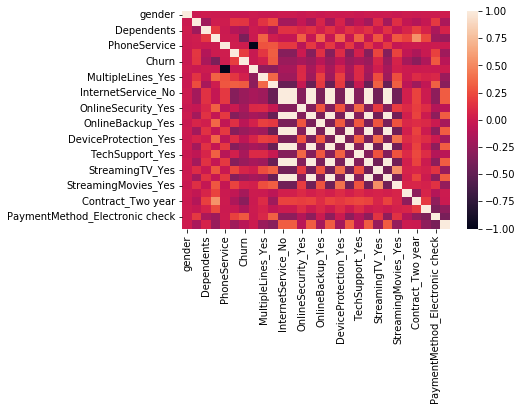

In [32]:
sns.heatmap(corr_matrix)

In [33]:
data = dummy_data.drop(columns=["customerID",
                                "PhoneService",
                                "StreamingMovies_Yes",
                                "Contract_Two year",
                                "OnlineBackup_No internet service",
                                "InternetService_No",
                                "TechSupport_No internet service",
                                "DeviceProtection_No internet service",
                                "OnlineSecurity_No internet service",
                                "StreamingTV_No internet service",
                                "StreamingMovies_No internet service"])

In [34]:
data.corr()["Churn"].sort_values(ascending=False)

Churn                                    1.000
InternetService_Fiber optic              0.307
PaymentMethod_Electronic check           0.301
PaperlessBilling                         0.191
SeniorCitizen                            0.151
StreamingTV_Yes                          0.063
MultipleLines_Yes                        0.040
gender                                  -0.009
MultipleLines_No phone service          -0.012
DeviceProtection_Yes                    -0.066
OnlineBackup_Yes                        -0.082
PaymentMethod_Mailed check              -0.091
PaymentMethod_Credit card (automatic)   -0.135
Dependents                              -0.163
TechSupport_Yes                         -0.165
OnlineSecurity_Yes                      -0.171
Contract_One year                       -0.178
tenure                                  -0.354
Name: Churn, dtype: float64

In [35]:
X, y = data.drop(columns="Churn"), data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 44)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 44)

In [251]:
scaler = StandardScaler()
new_data = standard.fit_transform()

In [252]:
new_data

array([[-1.00943013, -0.44032709, -0.65230493, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 0.99065797, -0.44032709, -0.65230493, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [ 0.99065797, -0.44032709, -0.65230493, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-1.00943013, -0.44032709,  1.53302536, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 0.99065797,  2.27103902, -0.65230493, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [ 0.99065797, -0.44032709, -0.65230493, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [ ]:
minmax = MinMaxScaler()
minmax_data = minmax.fit_transform(data)